In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
gme = pd.read_json('gme.json')

In [2]:
gme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


The variables in this data set are Date (The date that the stock’s behavior was observed.), Open (The price the stock sold for as soon as the markets opened.), High (The highest price the stock sold for on a particular day.), Low (The lowest price the stock sold for on a particular day.), Close (The price the stock sold for as soon as the markets closed.), Adj Close (The close price after all corporate actions of the day are accounted for (i.e. dividends, splitting, etc.).), and Volume (The number of stocks traded (bought and sold) in a day.)

In [3]:
gme["High"].idxmax()

4772

In [4]:
gme["Date"].loc[4772]

Timestamp('2021-01-28 00:00:00')

In [5]:
count = 0
total = 0
for i in range(len(gme)):
    if gme.loc[i]['Date'].month == 1:
        avg  = gme.loc[i]["High"] +gme.loc[i]["Low"]/2
        total += avg
        count += 1
total/count

12.83181743370786

In [6]:
count = 0
total = 0
for i in range(len(gme)):
    if gme.loc[i]['Date'].month == 7:
        avg  = gme.loc[i]["High"] +gme.loc[i]["Low"]/2
        total += avg
        count += 1
total/count

14.33493130818966

<AxesSubplot:xlabel='Low', ylabel='Volume'>

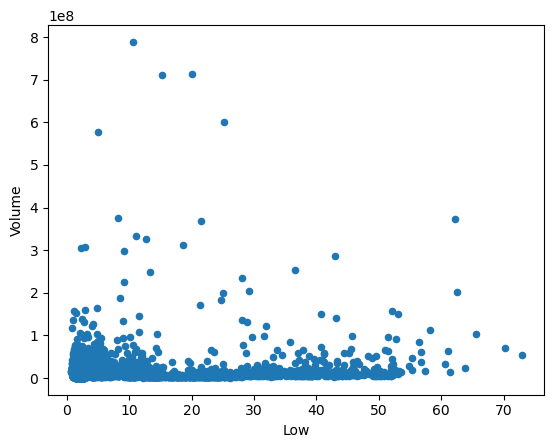

In [7]:
gme.plot.scatter(x ='Low', y= 'Volume', s=None, c=None)

In [8]:
gme['Volume'].corr(gme['Low'])

0.10259646883179024

In [9]:
dateAsNum = gme['Date']
day = 0
for i in range(len(gme)):
    if gme.loc[i]['Date'].days == :
        
gme.loc[i] = day

SyntaxError: invalid syntax (3904828016.py, line 4)

In [ ]:
sns.scatterplot(data= gme, x="Date", y="High")

In [ ]:
gme['Date'].corr(gme['High'])

In [ ]:
log_high = np.log(gme["High"])
gme["Log High"] = log_high

In [ ]:
gme['numeric_time'] = pd.to_datetime(gme['Date']).astype('int64') // 10**9  # Converts to seconds since epoch

# Now you can calculate the Pearson correlation between 'numeric_time' and another variable
correlation = gme['numeric_time'].corr(gme['Log High'])

In [10]:
tsla = pd.read_json('tsla.json')

In [11]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2516 non-null   datetime64[ns]
 1   open            2516 non-null   float64       
 2   high            2516 non-null   float64       
 3   low             2516 non-null   float64       
 4   close           2516 non-null   float64       
 5   volume          2516 non-null   int64         
 6   rsi_7           2516 non-null   float64       
 7   rsi_14          2516 non-null   float64       
 8   cci_7           2516 non-null   float64       
 9   cci_14          2516 non-null   float64       
 10  sma_50          2516 non-null   float64       
 11  ema_50          2516 non-null   float64       
 12  sma_100         2516 non-null   float64       
 13  ema_100         2516 non-null   float64       
 14  macd            2516 non-null   float64       
 15  boll

<AxesSubplot:xlabel='open', ylabel='close'>

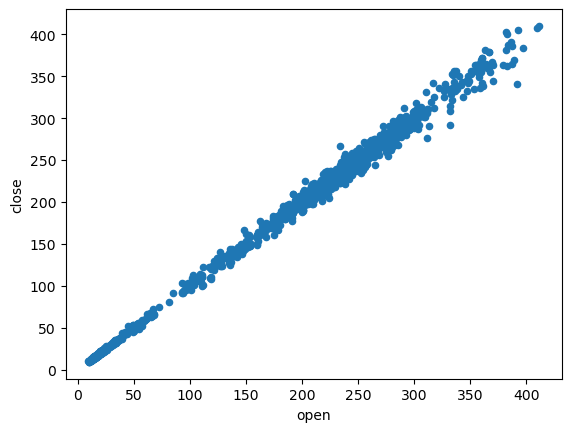

In [12]:
tsla.plot.scatter(x ='open', y= 'close', s=None, c=None)

In [13]:
tsla['open'].corr(tsla['close'])

0.9990807450500195

In [16]:
gme.loc[gme["Date"].idxmax()]

Date         2024-05-13 00:00:00
Open                       26.34
High                   38.200001
Low                        24.77
Close                  30.450001
Adj Close              30.450001
Volume                 182308700
Name: 5599, dtype: object

In [21]:
gme.loc[gme["Date"].idxmin()]

Date         2002-02-13 00:00:00
Open                     2.40625
High                       2.515
Low                      2.38125
Close                     2.5125
Adj Close               1.691666
Volume                  76216000
Name: 0, dtype: object

In [20]:
count = 0
for i in range(len(gme)):
    if gme.loc[i]['Date'].year == 2019:
        count += 1
print(count)

252


In [24]:
for j in range(len(gme['Date'].year)):
    for i in range(len(gme)):
        if gme.loc[i]['Date'].year == j:
            count += 1
print(count)

AttributeError: 'Series' object has no attribute 'year'

Welcome to Alpha Vantage! Here is your API key: YTBRS0WG5ZQBLXOS. Please record this API key at a safe place for future data access.

In [27]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GME&interval=5min&apikey=YTBRS0WG5ZQBLXOS'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'GME', '3. Last Refreshed': '2024-09-26 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-09-26 19:55:00': {'1. open': '22.1790', '2. high': '22.2000', '3. low': '22.1600', '4. close': '22.1999', '5. volume': '1337'}, '2024-09-26 19:50:00': {'1. open': '22.1501', '2. high': '22.1880', '3. low': '22.1500', '4. close': '22.1500', '5. volume': '874'}, '2024-09-26 19:45:00': {'1. open': '22.1400', '2. high': '22.1800', '3. low': '22.1275', '4. close': '22.1599', '5. volume': '234'}, '2024-09-26 19:40:00': {'1. open': '22.1300', '2. high': '22.1895', '3. low': '22.1000', '4. close': '22.1200', '5. volume': '1982'}, '2024-09-26 19:35:00': {'1. open': '22.1300', '2. high': '22.1400', '3. low': '22.1000', '4. close': '22.1300', '5. volume': '603'}, '2024-09-26 19:30:00': {'1. open': '22.1500', '2. high': '22.1600', '3

In [28]:
example = pd.DataFrame(data['Time Series (5min)'])
example.head()

,2024-09-26 19:55:00,2024-09-26 19:50:00,2024-09-26 19:45:00,2024-09-26 19:40:00,2024-09-26 19:35:00,2024-09-26 19:30:00,2024-09-26 19:25:00,2024-09-26 19:20:00,2024-09-26 19:15:00,2024-09-26 19:10:00,...,2024-09-26 12:25:00,2024-09-26 12:20:00,2024-09-26 12:15:00,2024-09-26 12:10:00,2024-09-26 12:05:00,2024-09-26 12:00:00,2024-09-26 11:55:00,2024-09-26 11:50:00,2024-09-26 11:45:00,2024-09-26 11:40:00
1. open,22.1790,22.1501,22.1400,22.1300,22.1300,22.1500,22.1604,22.1800,22.1800,22.1800,...,22.2601,22.3200,22.3500,22.3500,22.3300,22.3300,22.2900,22.2500,22.2801,22.2800
2. high,22.2000,22.1880,22.1800,22.1895,22.1400,22.1600,22.1800,22.1800,22.1800,22.1800,...,22.2900,22.3253,22.3600,22.3800,22.4293,22.3498,22.3500,22.3200,22.3204,22.3000
3. low,22.1600,22.1500,22.1275,22.1000,22.1000,22.1100,22.1500,22.1509,22.1540,22.1500,...,22.2200,22.2250,22.2912,22.3400,22.3300,22.2800,22.2600,22.2500,22.2412,22.2101
4. close,22.1999,22.1500,22.1599,22.1200,22.1300,22.1400,22.1500,22.1800,22.1600,22.1600,...,22.2200,22.2650,22.3200,22.3550,22.3500,22.3250,22.3350,22.2850,22.2500,22.2814
5. volume,1337,874,234,1982,603,960,1102,776,22,314,...,22153,33699,27432,36917,62892,30555,34243,21062,30577,48461


In [31]:
gme.drop('Adj Close', axis=1, inplace=True)

In [ ]:
def gather_data(start, end):
    '''
    Request
    '''
    data = {
        "Date:" [],
        "Open:" [],
        
    }

In [ ]:
gme[].append